# Probelm Statement

The aim of this project is to analyze and forecast household power consumption using high-resolution time series data. Accurate energy consumption forecasting can help optimize electricity usage, support smart grid operations, and contribute to sustainable energy management.

We will leverage historical power usage data from a French household to uncover trends, seasonal patterns, and build a predictive model that can forecast future consumption.

 ### 📊Dataset Overview

* Source: UCI Machine Learning Repository

* Title: Individual household electric power consumption Data Set

* Location: Sceaux, France (7 km from Paris)

* Date Range: December 2006 to November 2010 (47 months)

* Records: 2,075,259 minute-level measurements

| Column                  | Description                                                                              |
| ----------------------- | ---------------------------------------------------------------------------------------- |
| `Date`, `Time`          | Date and time of measurement                                                             |
| `Global_active_power`   | Total active power (kW)                                                                  |
| `Global_reactive_power` | Total reactive power (kW)                                                                |
| `Voltage`               | Average voltage (V)                                                                      |
| `Global_intensity`      | Total current (A)                                                                        |
| `Sub_metering_1`        | Energy used by kitchen appliances                                                        |
| `Sub_metering_2`        | Energy used by laundry room appliances                                                   |
| `Sub_metering_3`        | Energy used by water heater and AC                                                       |


## Loading the data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/data.txt", sep=';', low_memory=False)

# Preview the first few rows
print(df.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [2]:
df.shape

(2075259, 9)

In [3]:
df.rename(columns={
    'Sub_metering_1': 'Kitchen',
    'Sub_metering_2': 'Laundry_Room',
    'Sub_metering_3': 'Water_Heater_AC'
}, inplace=True)


## Data Exploration

#### 1. Checking for missing values

In [4]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Kitchen                      0
Laundry_Room                 0
Water_Heater_AC          25979
dtype: int64

**Insight** : *There are almost 26000 missing records in the "Water_Heather_AC" column*

### 2. Checking for duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

**Insight** : *There are no duplicates in the dataset*

### 3. Checking data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Kitchen                object 
 7   Laundry_Room           object 
 8   Water_Heater_AC        float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


| Column                  | Data Type | Expected Type | Observation                                                                |
| ----------------------- | --------- | ------------- | -------------------------------------------------------------------------- |
| `Date`                  | object    | datetime      | Needs to be converted to `datetime` format for time series analysis        |
| `Time`                  | object    | datetime      | Should be combined with `Date` to create a full timestamp                  |
| `Global_active_power`   | object    | float         | Stored as string due to possible missing or malformed values (e.g., `"?"`) |
| `Global_reactive_power` | object    | float         | Same issue as above — needs cleaning                                       |
| `Voltage`               | object    | float         | Should be numeric — convert after handling missing/invalid values          |
| `Global_intensity`      | object    | float         | Same as above                                                              |
| `Kitchen`        | object    | float     | Requires type conversion                                                   |
| `Laundry`        | object    | float     | Requires type conversion                                                   |
| `Water_Heather_AC`        | float64   | float         | Correct type                                                               |


In [7]:
df['Global_active_power'].isin(['?']).sum()

np.int64(25979)

In [8]:
df[df['Global_active_power'] == '?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen,Laundry_Room,Water_Heater_AC
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [9]:
(df == '?').sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Kitchen                  25979
Laundry_Room             25979
Water_Heater_AC              0
dtype: int64

### **Conclusion** :
It turns out that there are missing values in the dataset formed by "?" instead of actual empty spaces. The reason why the expected type of the numeric features is marked as 'object' instead of 'float'.

In [10]:
# Handling the "?" values
import numpy as np
df.replace('?', np.nan, inplace=True)

In [11]:
(df == '?').sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Kitchen                  0
Laundry_Room             0
Water_Heater_AC          0
dtype: int64

In [12]:
#  Convert all to float except 'Date' and 'Time'
cols_to_convert = df.columns.difference(['Date', 'Time'])

df[cols_to_convert] = df[cols_to_convert].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Kitchen                float64
 7   Laundry_Room           float64
 8   Water_Heater_AC        float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [14]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Kitchen                  25979
Laundry_Room             25979
Water_Heater_AC          25979
dtype: int64

- *So we basically handled the problem of data types, but we need to handle the missing values too* .

### Convert to datetime index

In [15]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [16]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen,Laundry_Room,Water_Heater_AC
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Handling missing values 
To handle the missing values we will try using the method of **"Time Based Interpolation"**

In [17]:
# This fills the missing values by linearly estimating them based on time.
df = df.interpolate(method='time')

In [18]:
# Handle edge cases (beginning or end missing values)
df = df.fillna(method='bfill')  # fill from below
df = df.fillna(method='ffill')  # fill from above

C:\Users\mouad\AppData\Local\Temp\ipykernel_19992\3436852909.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')  # fill from below
C:\Users\mouad\AppData\Local\Temp\ipykernel_19992\3436852909.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # fill from above


In [19]:
# Let's check if everything works as expected
print(df.isna().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Kitchen                  0
Laundry_Room             0
Water_Heater_AC          0
dtype: int64


## Exploratory Data Analysis (EDA)

### Visualize Trends

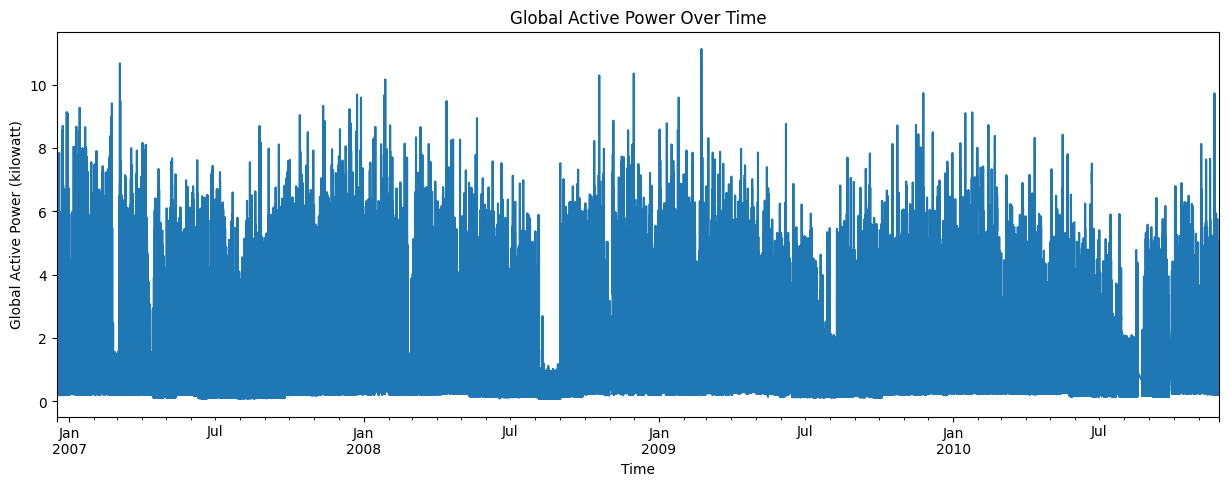

In [20]:
import matplotlib.pyplot as plt

df['Global_active_power'].plot(figsize=(15, 5), title='Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()

**Insight:** The minute-to-minute data shows a stable baseline of low power usage with consistent, short-lived peaks, indicating dynamic but predictable demand patterns over the four years.

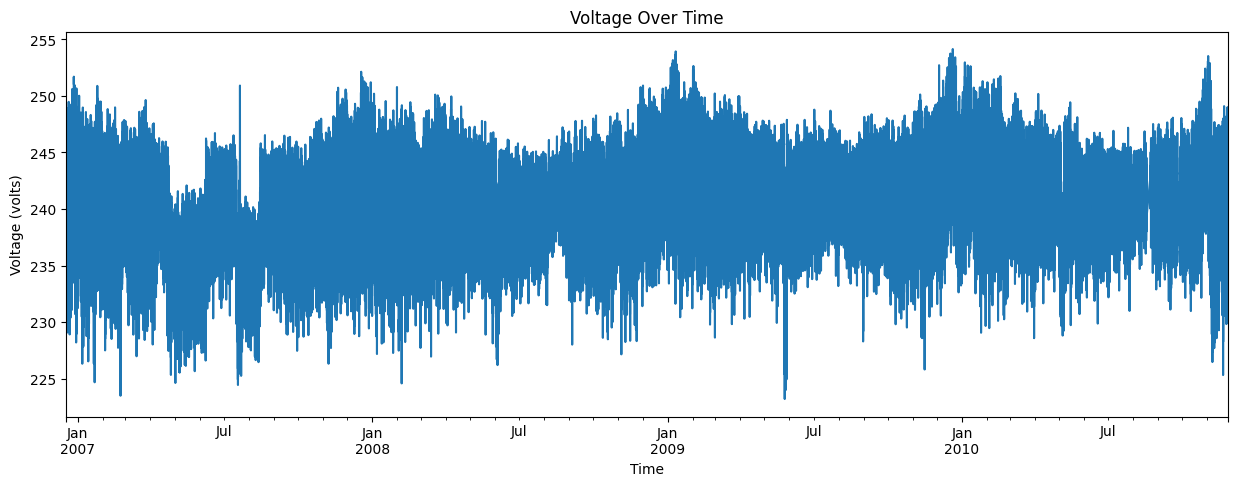

In [21]:
import matplotlib.pyplot as plt

df['Voltage'].plot(figsize=(15, 5), title='Voltage Over Time')
plt.xlabel('Time')
plt.ylabel('Voltage (volts)')
plt.show()


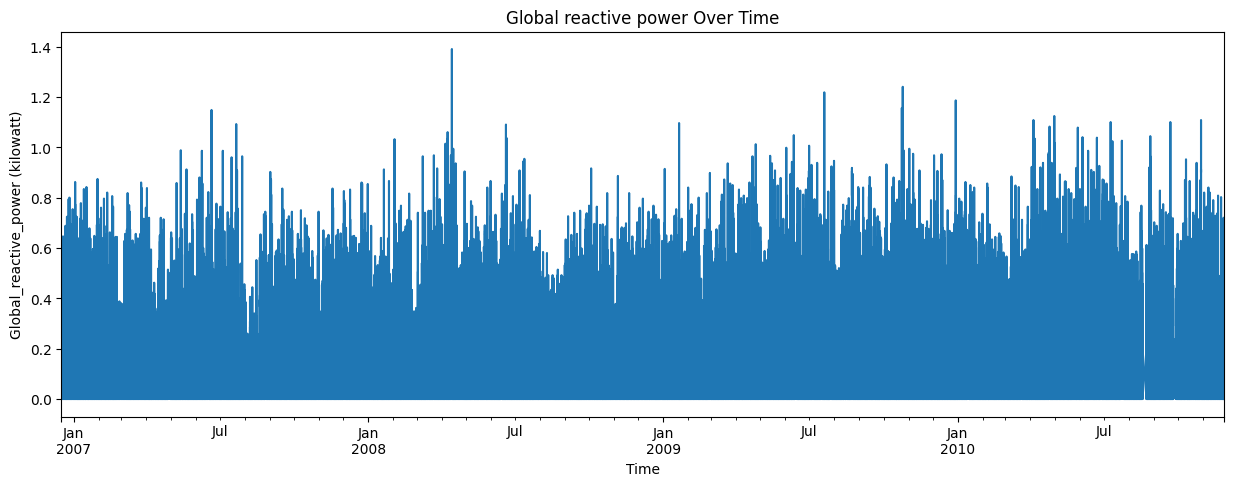

In [22]:
import matplotlib.pyplot as plt

df['Global_reactive_power'].plot(figsize=(15, 5), title='Global reactive power Over Time')
plt.xlabel('Time')
plt.ylabel('Global_reactive_power (kilowatt)')
plt.show()


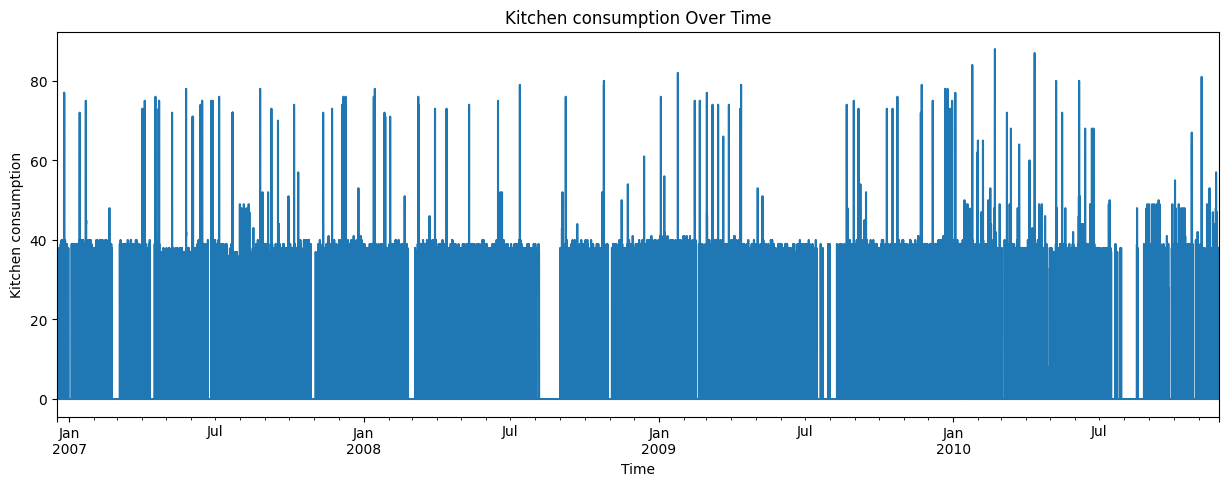

In [23]:
import matplotlib.pyplot as plt

df['Kitchen'].plot(figsize=(15, 5), title='Kitchen consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Kitchen consumption')
plt.show()

**Insight:** Kitchen consumption shows a stable baseline with regular spikes, reflecting typical kitchen activity patterns (e.g., cooking peaks) over the four years, with no major changes in overall usage behavior.

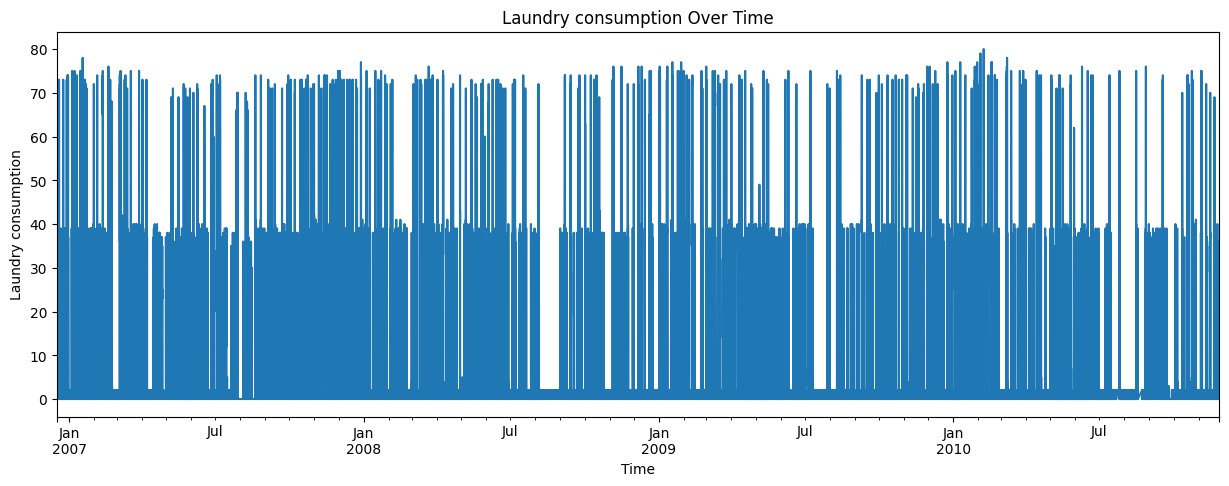

In [24]:
import matplotlib.pyplot as plt

df['Laundry_Room'].plot(figsize=(15, 5), title='Laundry consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Laundry consumption')
plt.show()

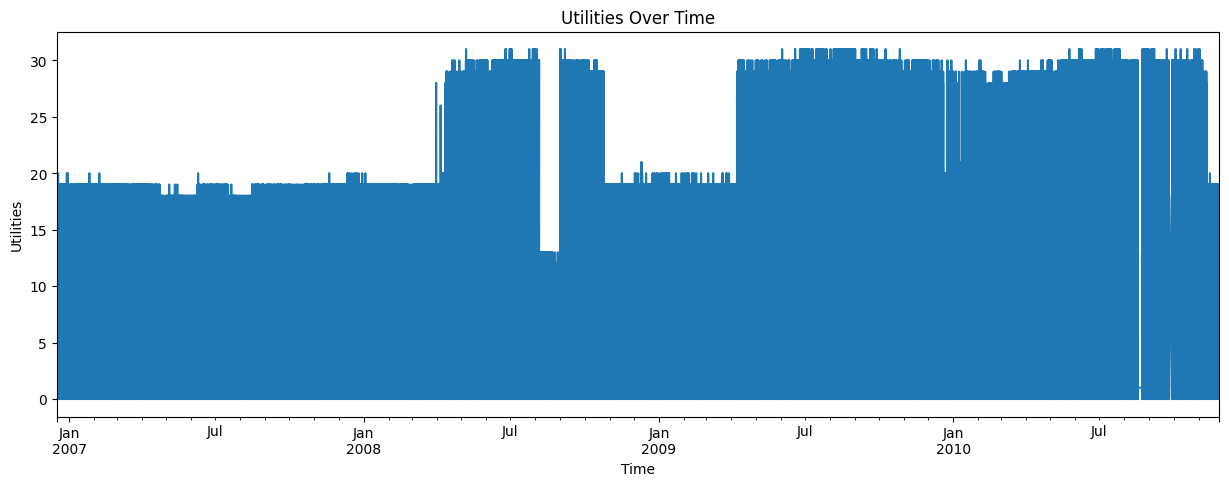

In [25]:
import matplotlib.pyplot as plt

df['Water_Heater_AC'].plot(figsize=(15, 5), title='Utilities Over Time')
plt.xlabel('Time')
plt.ylabel('Utilities')
plt.show()

**Insight:** The key takeaway is a significant and sustained increase in utility usage starting in mid-2008, possibly due to a systemic change, with a brief interruption in 2009. The minute-to-minute data highlights both the new baseline and the variability in demand.

### Plot Global Active Power over a sample month (January 2007)

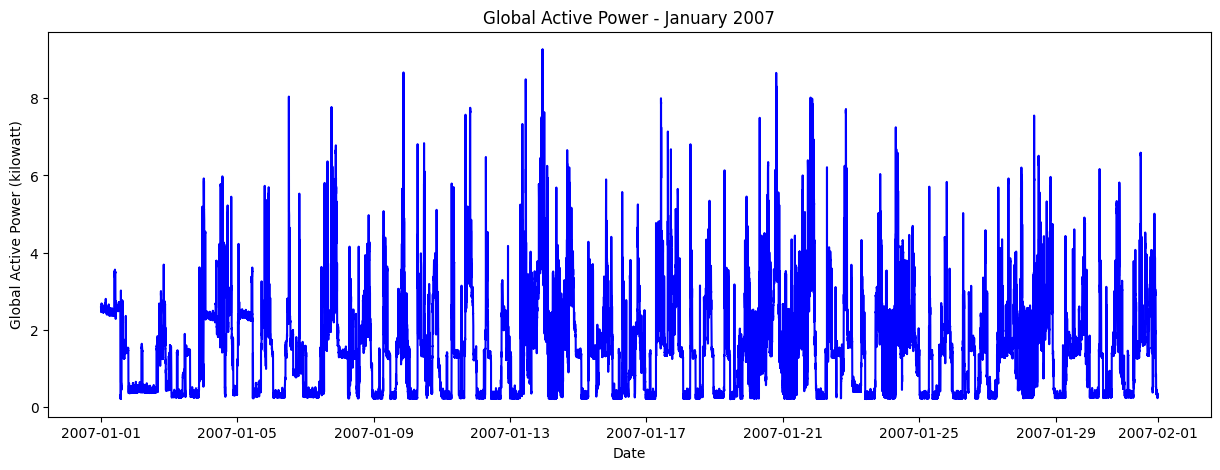

In [26]:
# Filter data for January 2007
df_jan2007 = df['2007-01-01':'2007-01-31']

plt.figure(figsize=(15,5))
plt.plot(df_jan2007.index, df_jan2007['Global_active_power'], color='blue')
plt.title('Global Active Power - January 2007')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()

-*Daily Patterns*: The minute-to-minute data reveals clear daily cycles. Power usage spikes to higher values (up to 8 kW) at certain times each day, likely corresponding to peak activity hours (e.g., morning or evening), and drops to lower values (around 0-2 kW) during off-peak times, possibly overnight.

-*High Variability*: Within each day, power usage fluctuates rapidly, often jumping between 0 and 8 kW. This reflects short-term changes in demand, such as appliances or systems turning on and off.

-*Consistent Peaks*: The maximum power usage (around 8 kW) is consistent across most days, suggesting a recurring peak demand, possibly from a specific activity or load (e.g., heating, cooking, or industrial processes).

-*Low Usage Periods*: There are frequent drops to near-zero power usage, especially noticeable on January 1st and a few other days (e.g., around January 5th). This could indicate periods of minimal activity, intentional shutdowns, or data collection issues.

-*Weekly Trends*: There’s a slight hint of weekly patterns—some days (e.g., around January 7th, 14th, and 21st) show denser spikes, possibly indicating higher activity on weekdays versus weekends.


### Plot Voltage over the same period

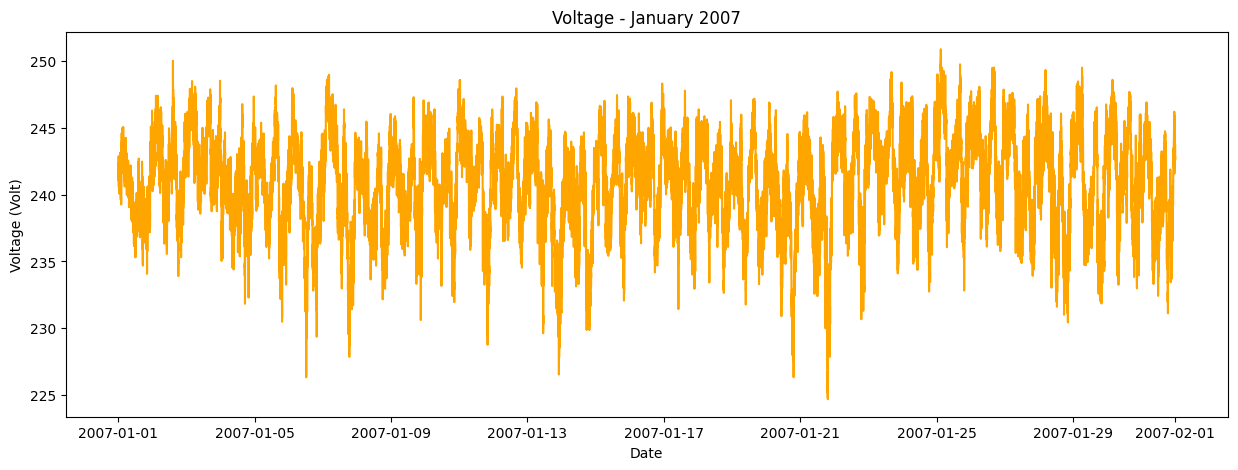

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df_jan2007.index, df_jan2007['Voltage'], color='orange')
plt.title('Voltage - January 2007')
plt.xlabel('Date')
plt.ylabel('Voltage (Volt)')
plt.show()

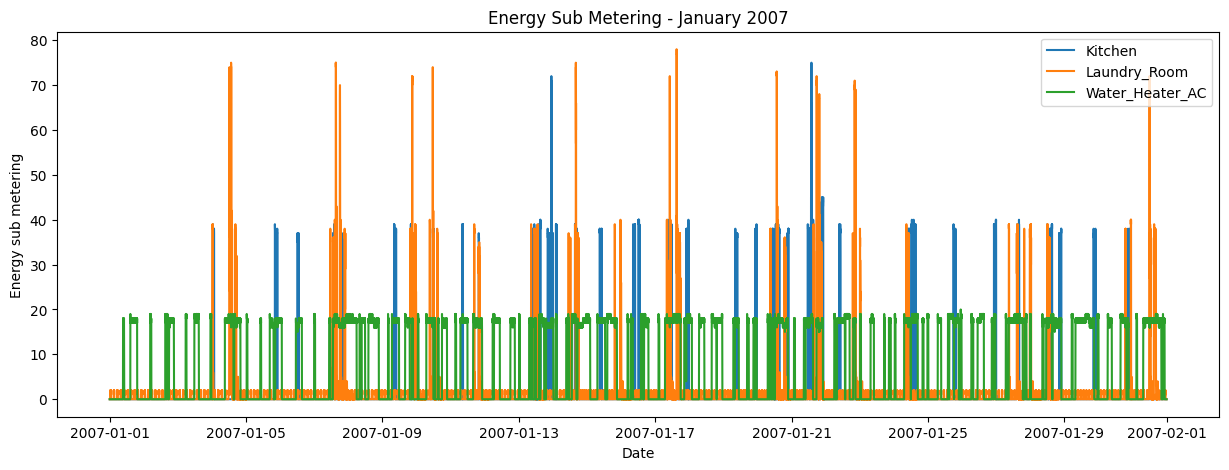

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df_jan2007.index, df_jan2007['Kitchen'], label='Kitchen')
plt.plot(df_jan2007.index, df_jan2007['Laundry_Room'], label='Laundry_Room')
plt.plot(df_jan2007.index, df_jan2007['Water_Heater_AC'], label='Water_Heater_AC')
plt.title('Energy Sub Metering - January 2007')
plt.xlabel('Date')
plt.ylabel('Energy sub metering')
plt.legend()
plt.show()


**Insight**: The energy sub-metering data highlights distinct usage patterns, with Laundry room consumption driving the highest peaks, Water_Heather_AC showing steady baseline usage, and Kitchen contributing moderate variability, all following daily cycles without a clear weekly trend.

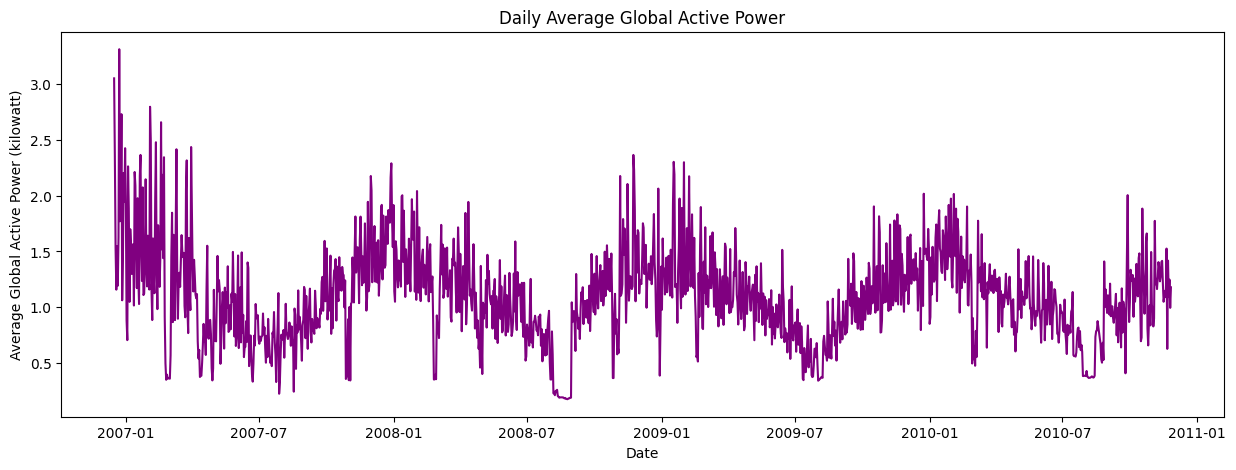

In [29]:
daily_power = df['Global_active_power'].resample('D').mean()

plt.figure(figsize=(15,5))
plt.plot(daily_power.index, daily_power, color='purple')
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Average Global Active Power (kilowatt)')
plt.show()


**The daily average global active power shows a clear seasonal trend, with higher usage in winter and lower in summer**

### Save the cleaned data

In [30]:
df.to_csv('data/cleaned_data.csv', index=True)